In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [30]:
df = pd.read_csv("/kaggle/input/implied-volatility/option_implied_v.csv")

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week


In [33]:
df

,Date,Expiry,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,Implied_Volatility,Settle Price,year,month,day,day_of_week
0,2019-04-02,2019-04-04,1,10000.0,375.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1716.839283,18.0825,1717.00,2019,4,2,1
1,2019-04-02,2019-04-04,1,10050.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1666.857479,18.0825,1667.05,2019,4,2,1
2,2019-04-02,2019-04-04,1,10100.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1616.875676,18.0825,1617.05,2019,4,2,1
3,2019-04-02,2019-04-04,1,10150.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1566.893872,18.0825,1567.10,2019,4,2,1
4,2019-04-02,2019-04-04,1,10200.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1516.912068,18.0825,1517.10,2019,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646191,2024-03-28,2028-12-28,0,23000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1090.588233,12.8325,355.80,2024,3,28,3
2646192,2024-03-28,2028-12-28,0,24000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1320.485547,12.8325,493.50,2024,3,28,3
2646193,2024-03-28,2028-12-28,0,25000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1576.276690,12.8325,664.00,2024,3,28,3
2646194,2024-03-28,2028-12-28,0,26000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1857.824399,12.8325,869.65,2024,3,28,3


In [34]:
X = df[['Option_type', 'Strike Price', 'Open Int', 'Change in OI', 'Underlying Value', 'time_to_maturity_days', 'riskfree_rates', 'Div_yield','Historical Volatility','Implied_Volatility','year', 'month', 'day', 'day_of_week']]
y = df['Settle Price']

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [36]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1765, random_state=42)

In [38]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# import numpy as np
# import xgboost as xgb
# from tqdm.auto import tqdm  # Using tqdm.auto to ensure compatibility with notebooks and consoles

# # Learning rate decay function
# def eta_decay(iteration):
#     max_iter = 40000
#     x = iteration + 1
#     eta_base = 0.5
#     eta_min = 0.1
#     decay_rate = -(x / 8000) ** 2 / max_iter
#     return eta_min + (eta_base - eta_min) * np.exp(decay_rate)

# # Generate learning rate decay for each iteration
# max_iter = 40000
# eta_decays = np.array([eta_decay(iteration) for iteration in range(max_iter)])

# # XGBoost parameters
# PARAMS = {
#     'booster': 'gbtree',
#     'eval_metric': 'mae',
#     'max_depth': 10,
#     'tree_method': 'hist',  # Enable GPU acceleration
#     'eta': 0.5,  # Initial learning rate
#     'device' : 'cuda',  # Use GPU
#     'reg_lambda' : 10,
#     'reg_alpha' : 0.2,
#     #'gamma': 2
# }

# # Assuming dtrain and dval are defined XGBoost DMatrix objects
# progress = dict()

# # Define a callback for tqdm to show the progress bar correctly
# class TQDMCallback(xgb.callback.TrainingCallback):
#     def __init__(self, total):
#         self.bar = tqdm(total=total, desc='Training Progress')

#     def after_iteration(self, model, epoch, evals_log):
#         self.bar.update(1)
#         return False  # Continue the training

#     def after_training(self, model):
#         self.bar.close()  # Ensure the progress bar closes after training
#         return model

# # Train model with progress bar
# model = xgb.train(
#     params=PARAMS,
#     dtrain=dtrain,
#     num_boost_round=max_iter,
#     early_stopping_rounds=100,
#     evals=[(dtrain, 'train'), (dval, 'validation')],
#     evals_result=progress,
#     verbose_eval=100,
#     callbacks=[
#         TQDMCallback(max_iter),
#         xgb.callback.LearningRateScheduler(
#             lambda iteration: eta_decays[iteration] if iteration < len(eta_decays) else eta_decays[-1]
#         )
#     ]
# )

# print("Model training complete.")
# # Optionally, access and print the evaluation results
# print(progress)


Training Progress:   0%|          | 0/40000 [00:00<?, ?it/s]

[0]	train-mae:595.48352	validation-mae:594.82652
[100]	train-mae:52.67586	validation-mae:57.25600
[200]	train-mae:41.18271	validation-mae:47.63361
[300]	train-mae:35.35166	validation-mae:43.31409
[400]	train-mae:31.31848	validation-mae:40.53375
[500]	train-mae:28.59276	validation-mae:38.80267
[600]	train-mae:26.34064	validation-mae:37.42405
[700]	train-mae:24.59617	validation-mae:36.46115
[800]	train-mae:23.15760	validation-mae:35.73830
[900]	train-mae:21.90390	validation-mae:35.09090
[1000]	train-mae:20.77412	validation-mae:34.55605
[1100]	train-mae:19.76533	validation-mae:34.07841
[1200]	train-mae:18.89660	validation-mae:33.68976
[1300]	train-mae:18.16927	validation-mae:33.40263
[1400]	train-mae:17.44469	validation-mae:33.07743
[1500]	train-mae:16.76365	validation-mae:32.77667
[1600]	train-mae:16.18570	validation-mae:32.53271
[1700]	train-mae:15.63362	validation-mae:32.29853
[1800]	train-mae:15.13744	validation-mae:32.10560
[1900]	train-mae:14.68991	validation-mae:31.93545
[2000]	tra

In [11]:
# import numpy as np
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Assuming 'model' is your trained XGBoost model and 'dtest' is your test dataset
# y_test_pred = model.predict(dtest)

# # Calculate MAE
# mae = mean_absolute_error(y_test, y_test_pred)
# print("Mean Absolute Error (MAE) on test data:", mae)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# print("Root Mean Squared Error (RMSE) on test data:", rmse)


Mean Absolute Error (MAE) on test data: 29.224477045863
Root Mean Squared Error (RMSE) on test data: 64.17256945136222


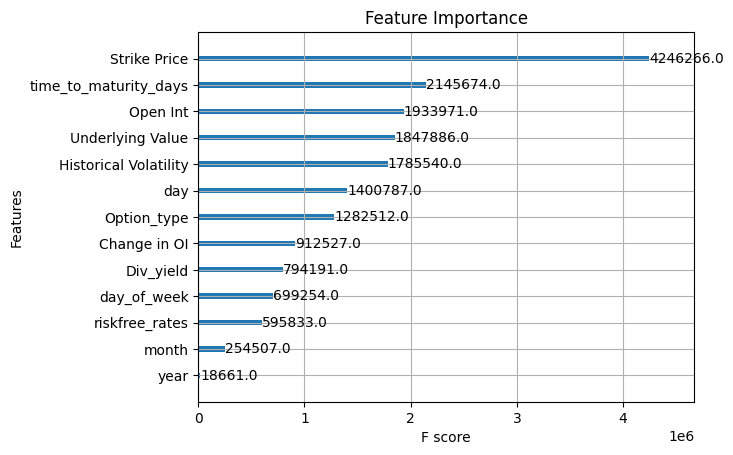

In [12]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# xgb.plot_importance(model)
# plt.title('Feature Importance')
# plt.show()


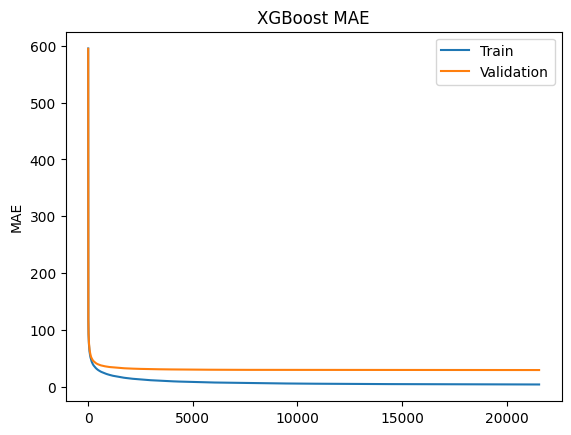

In [15]:
# # Extract the MAE for training and validation from the evaluation result
# epochs = len(progress['validation']['mae'])
# x_axis = range(0, epochs)

# # Plotting
# fig, ax = plt.subplots()
# ax.plot(x_axis, progress['train']['mae'], label='Train')
# ax.plot(x_axis, progress['validation']['mae'], label='Validation')
# ax.legend()

# plt.ylabel('MAE')
# plt.title('XGBoost MAE')
# plt.show()

# # For more advanced, smooth curves, consider averaging the results over multiple iterations


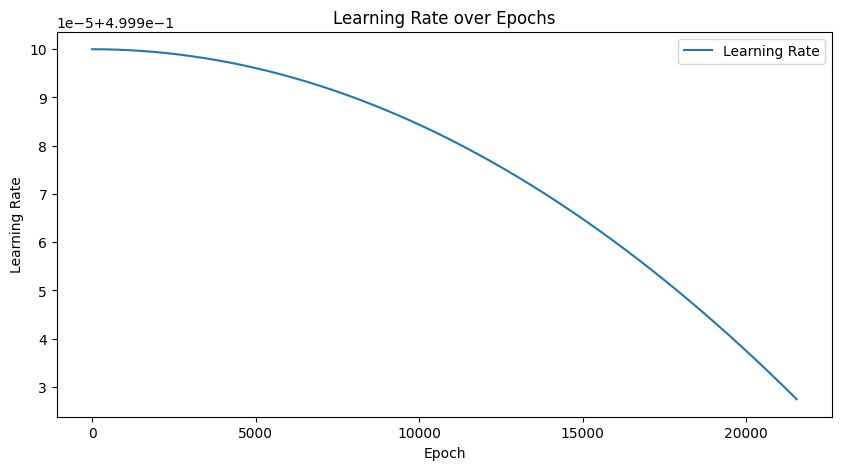

In [16]:
# plt.figure(figsize=(10, 5))
# plt.plot(x_axis, eta_decays[:epochs], label='Learning Rate')
# plt.title('Learning Rate over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Learning Rate')
# plt.legend()
# plt.show()


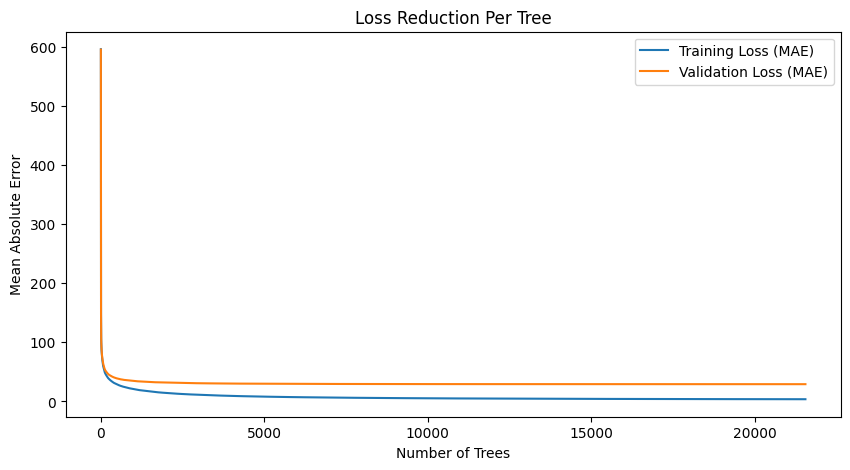

In [17]:
# import matplotlib.pyplot as plt

# # Assuming 'progress' is the dictionary containing evaluation metrics
# train_mae = progress['train']['mae']
# val_mae = progress['validation']['mae']

# plt.figure(figsize=(10, 5))
# plt.plot(train_mae, label='Training Loss (MAE)')
# plt.plot(val_mae, label='Validation Loss (MAE)')
# plt.title('Loss Reduction Per Tree')
# plt.xlabel('Number of Trees')
# plt.ylabel('Mean Absolute Error')
# plt.legend()
# plt.show()


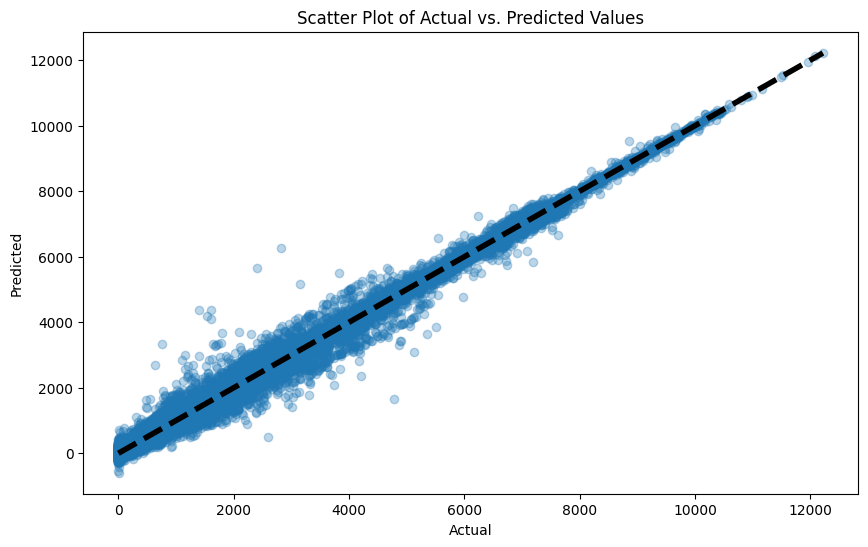

In [20]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred, alpha=0.3)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Scatter Plot of Actual vs. Predicted Values')
# plt.show()


In [21]:
# model.save_model('xgboost_model_10.json')

In [ ]:
# # Load the model
# loaded_xgb_model = xgb.Booster()
# loaded_xgb_model.load_model('xgboost_model.json')


In [24]:
# import numpy as np
# import xgboost as xgb
# from tqdm.auto import tqdm  # Using tqdm.auto to ensure compatibility with notebooks and consoles

# # Learning rate decay function
# def eta_decay(iteration):
#     max_iter = 40000
#     x = iteration + 1
#     eta_base = 0.5
#     eta_min = 0.1
#     decay_rate = -(x / 8000) ** 2 / max_iter
#     return eta_min + (eta_base - eta_min) * np.exp(decay_rate)

# # Generate learning rate decay for each iteration
# max_iter = 40000
# eta_decays = np.array([eta_decay(iteration) for iteration in range(max_iter)])

# # XGBoost parameters
# PARAMS = {
#     'booster': 'gbtree',
#     'eval_metric': 'mae',
#     'max_depth': 15,
#     'tree_method': 'hist',  # Enable GPU acceleration
#     'eta': 0.5,  # Initial learning rate
#     'device' : 'cuda',  # Use GPU
#     'reg_lambda' : 15,
#     'reg_alpha' : 0.2,
#     #'gamma': 2
# }

# # Assuming dtrain and dval are defined XGBoost DMatrix objects
# progress = dict()

# # Define a callback for tqdm to show the progress bar correctly
# class TQDMCallback(xgb.callback.TrainingCallback):
#     def __init__(self, total):
#         self.bar = tqdm(total=total, desc='Training Progress')

#     def after_iteration(self, model, epoch, evals_log):
#         self.bar.update(1)
#         return False  # Continue the training

#     def after_training(self, model):
#         self.bar.close()  # Ensure the progress bar closes after training
#         return model

# # Train model with progress bar
# model = xgb.train(
#     params=PARAMS,
#     dtrain=dtrain,
#     num_boost_round=max_iter,
#     early_stopping_rounds=100,
#     evals=[(dtrain, 'train'), (dval, 'validation')],
#     evals_result=progress,
#     verbose_eval=100,
#     callbacks=[
#         TQDMCallback(max_iter),
#         xgb.callback.LearningRateScheduler(
#             lambda iteration: eta_decays[iteration] if iteration < len(eta_decays) else eta_decays[-1]
#         )
#     ]
# )

# print("Model training complete.")
# # Optionally, access and print the evaluation results
# #print(progress)


Training Progress:   0%|          | 0/40000 [00:00<?, ?it/s]

[0]	train-mae:550.67848	validation-mae:550.25816
[100]	train-mae:21.16934	validation-mae:32.29881
[200]	train-mae:15.17244	validation-mae:29.52652
[300]	train-mae:11.90646	validation-mae:28.34741
[400]	train-mae:9.87946	validation-mae:27.75853
[500]	train-mae:8.50413	validation-mae:27.39396
[600]	train-mae:7.54265	validation-mae:27.17160
[700]	train-mae:6.77201	validation-mae:27.00036
[800]	train-mae:6.20316	validation-mae:26.90676
[900]	train-mae:5.77338	validation-mae:26.85782
[1000]	train-mae:5.38534	validation-mae:26.79989
[1100]	train-mae:5.07277	validation-mae:26.76198
[1200]	train-mae:4.80613	validation-mae:26.73468
[1300]	train-mae:4.58413	validation-mae:26.71556
[1400]	train-mae:4.39676	validation-mae:26.70264
[1500]	train-mae:4.23647	validation-mae:26.69534
[1600]	train-mae:4.10411	validation-mae:26.68888
[1700]	train-mae:3.98109	validation-mae:26.68291
[1800]	train-mae:3.87981	validation-mae:26.68178
[1900]	train-mae:3.79286	validation-mae:26.67977
[2000]	train-mae:3.71328	v

In [25]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Assuming 'model' is your trained XGBoost model and 'dtest' is your test dataset
# y_test_pred = model.predict(dtest)

# # Calculate MAE
# mae = mean_absolute_error(y_test, y_test_pred)
# print("Mean Absolute Error (MAE) on test data:", mae)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# print("Root Mean Squared Error (RMSE) on test data:", rmse)

Mean Absolute Error (MAE) on test data: 26.745443661266343
Root Mean Squared Error (RMSE) on test data: 62.249800609196434


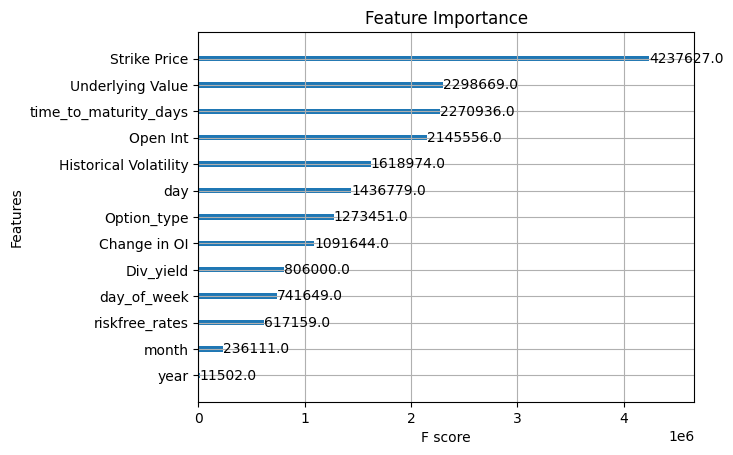

In [26]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# xgb.plot_importance(model)
# plt.title('Feature Importance')
# plt.show()


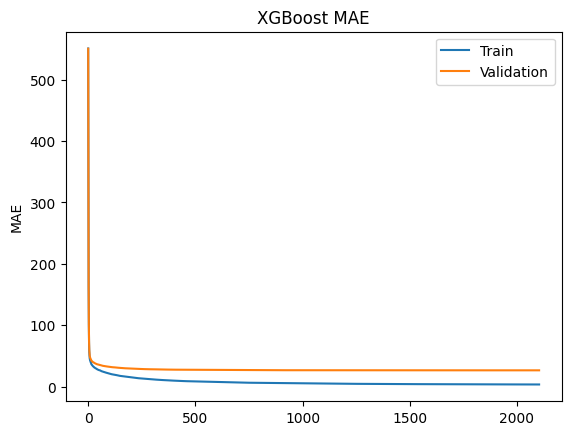

In [27]:
# # Extract the MAE for training and validation from the evaluation result
# epochs = len(progress['validation']['mae'])
# x_axis = range(0, epochs)

# # Plotting
# fig, ax = plt.subplots()
# ax.plot(x_axis, progress['train']['mae'], label='Train')
# ax.plot(x_axis, progress['validation']['mae'], label='Validation')
# ax.legend()

# plt.ylabel('MAE')
# plt.title('XGBoost MAE')
# plt.show()

# # For more advanced, smooth curves, consider averaging the results over multiple iterations


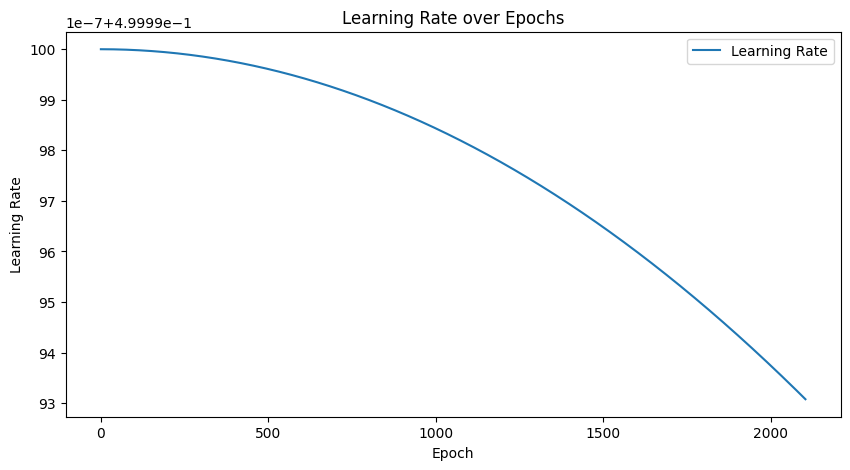

In [28]:
# plt.figure(figsize=(10, 5))
# plt.plot(x_axis, eta_decays[:epochs], label='Learning Rate')
# plt.title('Learning Rate over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Learning Rate')
# plt.legend()
# plt.show()


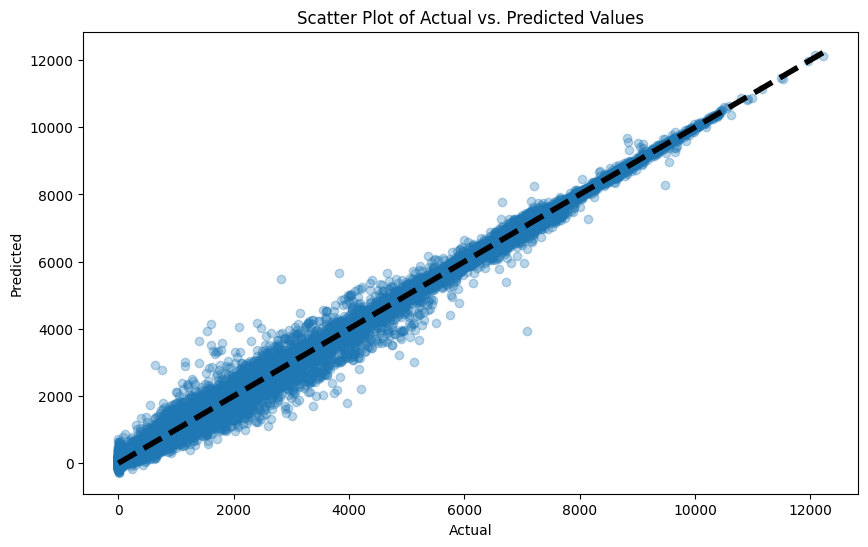

In [29]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred, alpha=0.3)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Scatter Plot of Actual vs. Predicted Values')
# plt.show()


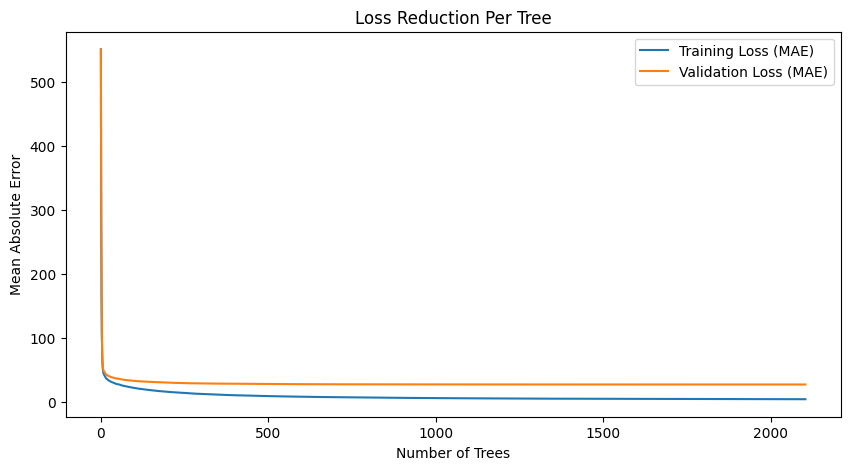

In [30]:
# import matplotlib.pyplot as plt

# # Assuming 'progress' is the dictionary containing evaluation metrics
# train_mae = progress['train']['mae']
# val_mae = progress['validation']['mae']

# plt.figure(figsize=(10, 5))
# plt.plot(train_mae, label='Training Loss (MAE)')
# plt.plot(val_mae, label='Validation Loss (MAE)')
# plt.title('Loss Reduction Per Tree')
# plt.xlabel('Number of Trees')
# plt.ylabel('Mean Absolute Error')
# plt.legend()
# plt.show()


In [34]:
# import numpy as np
# import xgboost as xgb
# from tqdm.auto import tqdm  # Using tqdm.auto to ensure compatibility with notebooks and consoles

# # Learning rate decay function
# def eta_decay(iteration):
#     max_iter = 40000
#     x = iteration + 1
#     eta_base = 0.1
#     eta_min = 0.01
#     decay_rate = -(x / 8000) ** 2 / max_iter
#     return eta_min + (eta_base - eta_min) * np.exp(decay_rate)

# # Generate learning rate decay for each iteration
# max_iter = 40000
# eta_decays = np.array([eta_decay(iteration) for iteration in range(max_iter)])

# # XGBoost parameters
# PARAMS = {
#     'booster': 'gbtree',
#     'eval_metric': 'mae',
#     'max_depth': 15,
#     'tree_method': 'hist',  # Enable GPU acceleration
#     'eta': 0.5,  # Initial learning rate
#     'device' : 'cuda',  # Use GPU
#     'reg_lambda' : 25,
#     'reg_alpha' : 0.2,
#     #'gamma': 2
# }

# # Assuming dtrain and dval are defined XGBoost DMatrix objects
# progress = dict()

# # Define a callback for tqdm to show the progress bar correctly
# class TQDMCallback(xgb.callback.TrainingCallback):
#     def __init__(self, total):
#         self.bar = tqdm(total=total, desc='Training Progress')

#     def after_iteration(self, model, epoch, evals_log):
#         self.bar.update(1)
#         return False  # Continue the training

#     def after_training(self, model):
#         self.bar.close()  # Ensure the progress bar closes after training
#         return model

# # Train model with progress bar
# model = xgb.train(
#     params=PARAMS,
#     dtrain=dtrain,
#     num_boost_round=max_iter,
#     early_stopping_rounds=100,
#     evals=[(dtrain, 'train'), (dval, 'validation')],
#     evals_result=progress,
#     verbose_eval=100,
#     callbacks=[
#         TQDMCallback(max_iter),
#         xgb.callback.LearningRateScheduler(
#             lambda iteration: eta_decays[iteration] if iteration < len(eta_decays) else eta_decays[-1]
#         )
#     ]
# )

# print("Model training complete.")
# # Optionally, access and print the evaluation results
# #print(progress)


Training Progress:   0%|          | 0/40000 [00:00<?, ?it/s]

[0]	train-mae:553.39382	validation-mae:552.86517
[100]	train-mae:29.35378	validation-mae:34.12070
[200]	train-mae:24.11226	validation-mae:29.83308
[300]	train-mae:21.67568	validation-mae:27.94090
[400]	train-mae:19.59220	validation-mae:26.45191
[500]	train-mae:18.14607	validation-mae:25.49603
[600]	train-mae:16.80809	validation-mae:24.57107
[700]	train-mae:15.74592	validation-mae:23.95862
[800]	train-mae:14.89722	validation-mae:23.44093
[900]	train-mae:14.10208	validation-mae:23.00307
[1000]	train-mae:13.26586	validation-mae:22.55793
[1100]	train-mae:12.66274	validation-mae:22.26494
[1200]	train-mae:12.21753	validation-mae:22.04738
[1300]	train-mae:11.72122	validation-mae:21.82329
[1400]	train-mae:11.27446	validation-mae:21.64066
[1500]	train-mae:10.95490	validation-mae:21.46456
[1600]	train-mae:10.63511	validation-mae:21.33064
[1700]	train-mae:10.33227	validation-mae:21.22220
[1800]	train-mae:10.02775	validation-mae:21.09760
[1900]	train-mae:9.73087	validation-mae:20.98222
[2000]	trai

In [35]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Assuming 'model' is your trained XGBoost model and 'dtest' is your test dataset
# y_test_pred = model.predict(dtest)

# # Calculate MAE
# mae = mean_absolute_error(y_test, y_test_pred)
# print("Mean Absolute Error (MAE) on test data:", mae)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# print("Root Mean Squared Error (RMSE) on test data:", rmse)

Mean Absolute Error (MAE) on test data: 19.60736974429928
Root Mean Squared Error (RMSE) on test data: 54.24444049843756


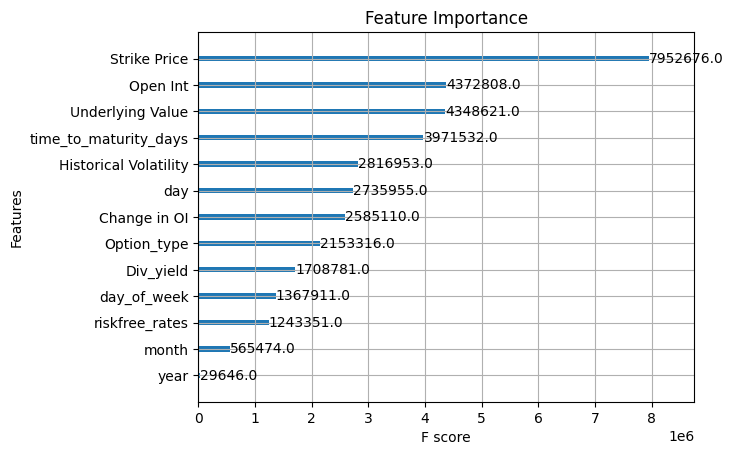

In [36]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# xgb.plot_importance(model)
# plt.title('Feature Importance')
# plt.show()

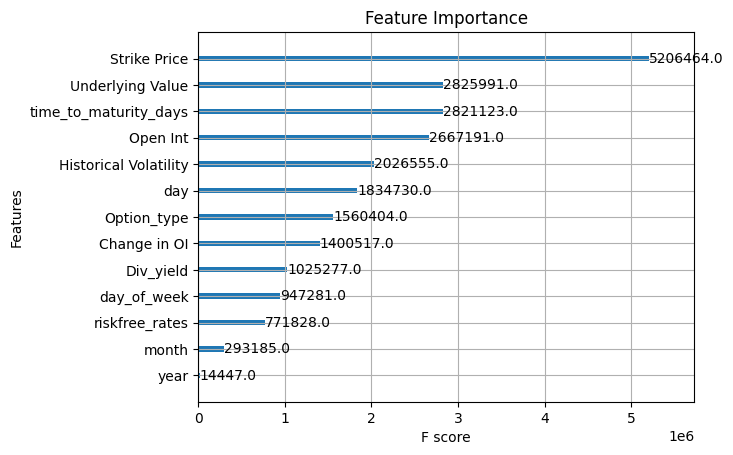

In [33]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# xgb.plot_importance(model)
# plt.title('Feature Importance')
# plt.show()

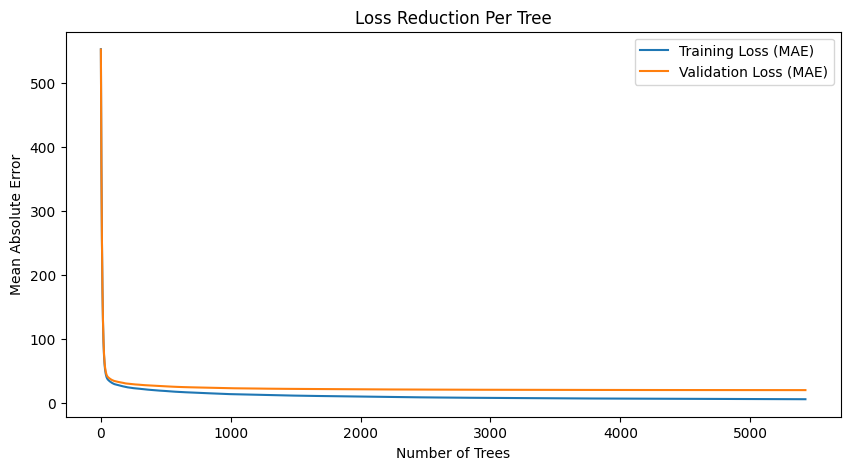

In [37]:
# import matplotlib.pyplot as plt

# # Assuming 'progress' is the dictionary containing evaluation metrics
# train_mae = progress['train']['mae']
# val_mae = progress['validation']['mae']

# plt.figure(figsize=(10, 5))
# plt.plot(train_mae, label='Training Loss (MAE)')
# plt.plot(val_mae, label='Validation Loss (MAE)')
# plt.title('Loss Reduction Per Tree')
# plt.xlabel('Number of Trees')
# plt.ylabel('Mean Absolute Error')
# plt.legend()
# plt.show()


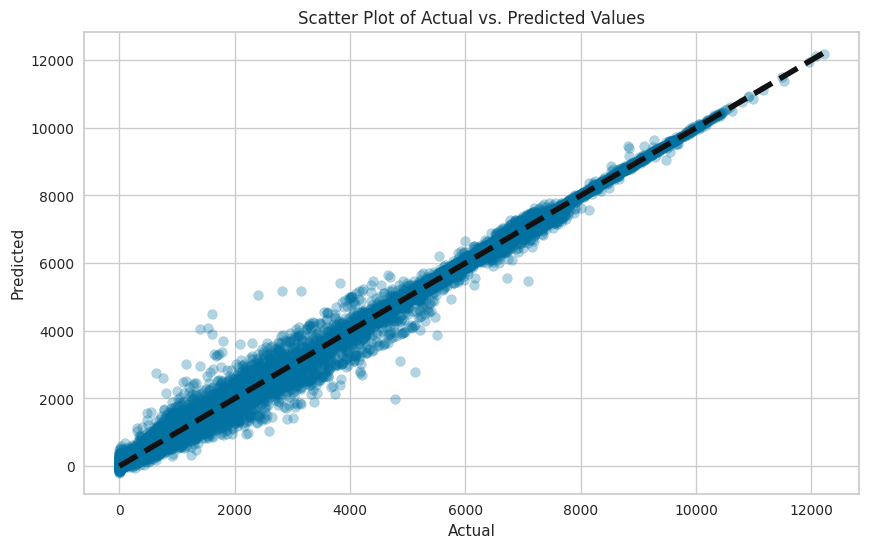

In [39]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred, alpha=0.3)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Scatter Plot of Actual vs. Predicted Values')
# plt.show()


In [ ]:
# import numpy as np
# import xgboost as xgb
# from tqdm.auto import tqdm  # Using tqdm.auto to ensure compatibility with notebooks and consoles

# # Learning rate decay function
# def eta_decay(iteration):
#     max_iter = 10000
#     x = iteration + 1
#     eta_base = 0.1
#     eta_min = 0.01
#     decay_rate = -(x / 8000) ** 2 / max_iter
#     return eta_min + (eta_base - eta_min) * np.exp(decay_rate)

# # Generate learning rate decay for each iteration
# max_iter = 10000
# eta_decays = np.array([eta_decay(iteration) for iteration in range(max_iter)])

# # XGBoost parameters
# PARAMS = {
#     'booster': 'gbtree',
#     'eval_metric': 'mae',
#     'max_depth': 15,
#     'tree_method': 'hist',  # Enable GPU acceleration
#     'eta': 0.5,  # Initial learning rate
#     'device' : 'cuda',  # Use GPU
#     'reg_lambda' : 25,
#     'reg_alpha' : 0.2,
#     #'gamma': 2
# }

# # Assuming dtrain and dval are defined XGBoost DMatrix objects
# progress = dict()

# # Define a callback for tqdm to show the progress bar correctly
# class TQDMCallback(xgb.callback.TrainingCallback):
#     def __init__(self, total):
#         self.bar = tqdm(total=total, desc='Training Progress')

#     def after_iteration(self, model, epoch, evals_log):
#         self.bar.update(1)
#         return False  # Continue the training

#     def after_training(self, model):
#         self.bar.close()  # Ensure the progress bar closes after training
#         return model

# # Train model with progress bar
# model = xgb.train(
#     params=PARAMS,
#     dtrain=dtrain,
#     num_boost_round=max_iter,
#     early_stopping_rounds=100,
#     evals=[(dtrain, 'train'), (dval, 'validation')],
#     evals_result=progress,
#     verbose_eval=100,
#     callbacks=[
#         TQDMCallback(max_iter),
#         xgb.callback.LearningRateScheduler(
#             lambda iteration: eta_decays[iteration] if iteration < len(eta_decays) else eta_decays[-1]
#         )
#     ]
# )

# print("Model training complete.")
# # Optionally, access and print the evaluation results
# #print(progress)


Training Progress:   0%|          | 0/40000 [00:00<?, ?it/s]

[0]	train-mae:553.51413	validation-mae:552.94545
[100]	train-mae:29.24741	validation-mae:34.01735
[200]	train-mae:24.20875	validation-mae:29.95511
[300]	train-mae:21.44096	validation-mae:27.79772
[400]	train-mae:19.36336	validation-mae:26.21541
[500]	train-mae:17.97174	validation-mae:25.28423
[600]	train-mae:16.91734	validation-mae:24.56539
[700]	train-mae:16.14789	validation-mae:24.06732
[800]	train-mae:15.08253	validation-mae:23.43121
[900]	train-mae:14.25753	validation-mae:22.92008
[1000]	train-mae:13.51475	validation-mae:22.50920
[1100]	train-mae:13.01582	validation-mae:22.25469
[1200]	train-mae:12.51982	validation-mae:21.99696
[1300]	train-mae:11.97504	validation-mae:21.76433
[1400]	train-mae:11.46979	validation-mae:21.58085
[1500]	train-mae:11.01431	validation-mae:21.40232
[1600]	train-mae:10.63326	validation-mae:21.23474
[1700]	train-mae:10.24876	validation-mae:21.04797
[1800]	train-mae:9.87569	validation-mae:20.92315
[1900]	train-mae:9.59480	validation-mae:20.80672
[2000]	train

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Assuming 'model' is your trained XGBoost model and 'dtest' is your test dataset
# y_test_pred = model.predict(dtest)

# # Calculate MAE
# mae = mean_absolute_error(y_test, y_test_pred)
# print("Mean Absolute Error (MAE) on test data:", mae)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# print("Root Mean Squared Error (RMSE) on test data:", rmse)

In [ ]:
# import matplotlib.pyplot as plt
# import xgboost as xgb

# xgb.plot_importance(model)
# plt.title('Feature Importance')
# plt.show()

In [28]:
import numpy as np
import xgboost as xgb
from tqdm.auto import tqdm  # Using tqdm.auto to ensure compatibility with notebooks and consoles

# Learning rate decay function
def eta_decay(iteration):
    max_iter = 10000
    x = iteration + 1
    eta_base = 0.1
    eta_min = 0.01
    decay_rate = -(x / 2000) ** 2 / max_iter
    return eta_min + (eta_base - eta_min) * np.exp(decay_rate)

# Generate learning rate decay for each iteration
max_iter = 10000
eta_decays = np.array([eta_decay(iteration) for iteration in range(max_iter)])

# XGBoost parameters
PARAMS = {
    'booster': 'gbtree',
    'eval_metric': 'mae',
    'max_depth': 15,
    'tree_method': 'hist',  # Enable GPU acceleration
    'eta': 0.5,  # Initial learning rate
    'device' : 'cuda',  # Use GPU
    'reg_lambda' : 25,
    'reg_alpha' : 0.2,
    #'gamma': 2
}

# Assuming dtrain and dval are defined XGBoost DMatrix objects
progress = dict()

# Define a callback for tqdm to show the progress bar correctly
class TQDMCallback(xgb.callback.TrainingCallback):
    def __init__(self, total):
        self.bar = tqdm(total=total, desc='Training Progress')

    def after_iteration(self, model, epoch, evals_log):
        self.bar.update(1)
        return False  # Continue the training

    def after_training(self, model):
        self.bar.close()  # Ensure the progress bar closes after training
        return model

# Train model with progress bar
model = xgb.train(
    params=PARAMS,
    dtrain=dtrain,
    num_boost_round=max_iter,
    early_stopping_rounds=100,
    evals=[(dtrain, 'train'), (dval, 'validation')],
    evals_result=progress,
    verbose_eval=100,
    callbacks=[
        TQDMCallback(max_iter),
        xgb.callback.LearningRateScheduler(
            lambda iteration: eta_decays[iteration] if iteration < len(eta_decays) else eta_decays[-1]
        )
    ]
)

print("Model training complete.")
# Optionally, access and print the evaluation results
#print(progress)


Training Progress:   0%|          | 0/10000 [00:00<?, ?it/s]

[0]	train-mae:552.44464	validation-mae:554.55594
[100]	train-mae:28.76373	validation-mae:33.66700
[200]	train-mae:24.00695	validation-mae:29.81229
[300]	train-mae:21.06761	validation-mae:27.54685
[400]	train-mae:19.08580	validation-mae:26.13201
[500]	train-mae:17.50591	validation-mae:25.03907
[600]	train-mae:16.43508	validation-mae:24.36613
[700]	train-mae:15.48672	validation-mae:23.79479
[800]	train-mae:14.68772	validation-mae:23.35271
[900]	train-mae:13.94373	validation-mae:22.94273
[1000]	train-mae:13.31322	validation-mae:22.64462
[1100]	train-mae:12.76536	validation-mae:22.38833
[1200]	train-mae:12.17592	validation-mae:22.11481
[1300]	train-mae:11.61828	validation-mae:21.83639
[1400]	train-mae:11.17628	validation-mae:21.65726
[1500]	train-mae:10.82837	validation-mae:21.54086
[1600]	train-mae:10.44591	validation-mae:21.37346
[1700]	train-mae:10.12262	validation-mae:21.24238
[1800]	train-mae:9.81385	validation-mae:21.10879
[1900]	train-mae:9.53735	validation-mae:20.99863
[2000]	train

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'model' is your trained XGBoost model and 'dtest' is your test dataset
y_test_pred = model.predict(dtest)

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (MAE) on test data:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) on test data:", rmse)

Mean Absolute Error (MAE) on test data: 19.722073906736156
Root Mean Squared Error (RMSE) on test data: 53.17874435118251


In [43]:
y_test

1585870      12.60
2144190    2155.85
458738     1980.55
2220750       4.45
2121441     183.45
            ...   
1425197     443.00
479013     3857.25
659867     2920.80
1638263    1146.80
1695569     690.35
Name: Settle Price, Length: 396930, dtype: float64

In [47]:
df_y_test = y_test.reset_index()
df_y_test.columns = ['index', 'Settle Price']

In [50]:
y_test_pred

array([  42.199585, 2127.1733  , 2016.3477  , ..., 2983.7915  ,
       1093.7699  ,  645.0669  ], dtype=float32)

In [51]:
df_y_test['test_pred'] = y_test_pred

In [52]:
df_y_test

,index,Settle Price,test_pred
0,1585870,12.60,42.199585
1,2144190,2155.85,2127.173340
2,458738,1980.55,2016.347656
3,2220750,4.45,6.550415
4,2121441,183.45,180.513977
...,...,...,...
396925,1425197,443.00,442.200928
396926,479013,3857.25,3857.512695
396927,659867,2920.80,2983.791504
396928,1638263,1146.80,1093.769897


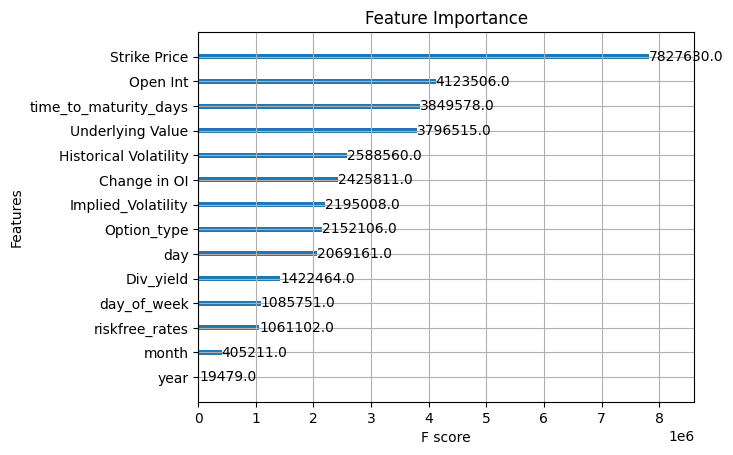

In [40]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

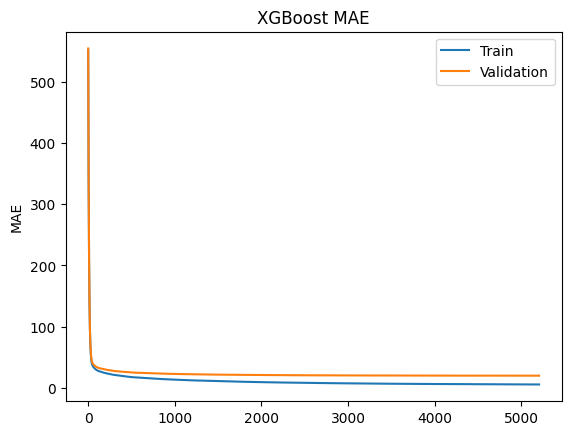

In [14]:
# Extract the MAE for training and validation from the evaluation result
epochs = len(progress['validation']['mae'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, progress['train']['mae'], label='Train')
ax.plot(x_axis, progress['validation']['mae'], label='Validation')
ax.legend()

plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()

# For more advanced, smooth curves, consider averaging the results over multiple iterations


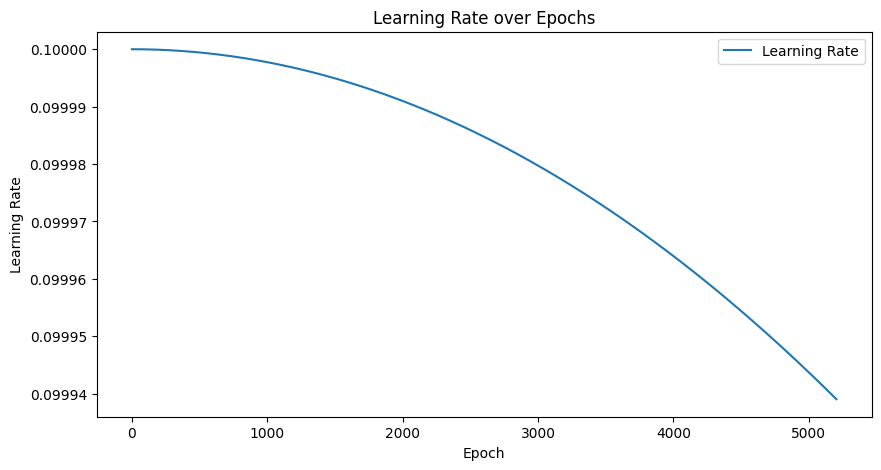

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(x_axis, eta_decays[:epochs], label='Learning Rate')
plt.title('Learning Rate over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


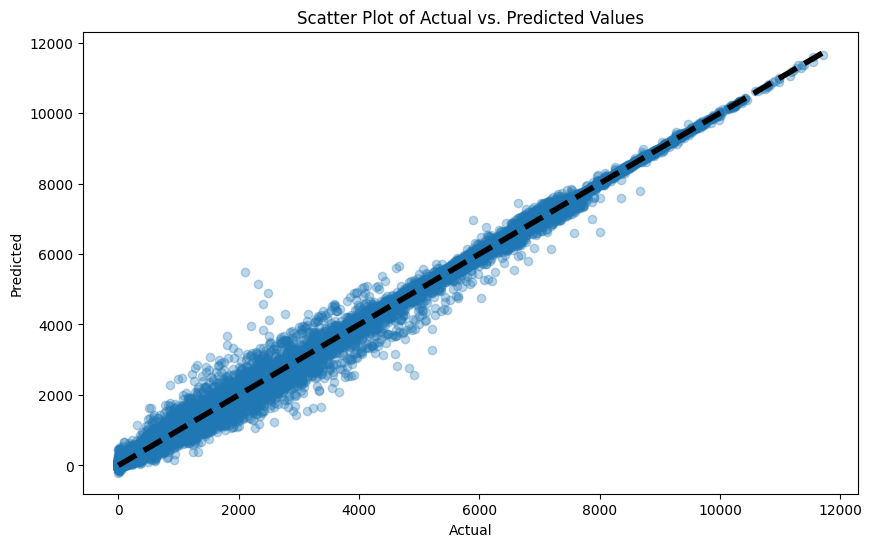

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()


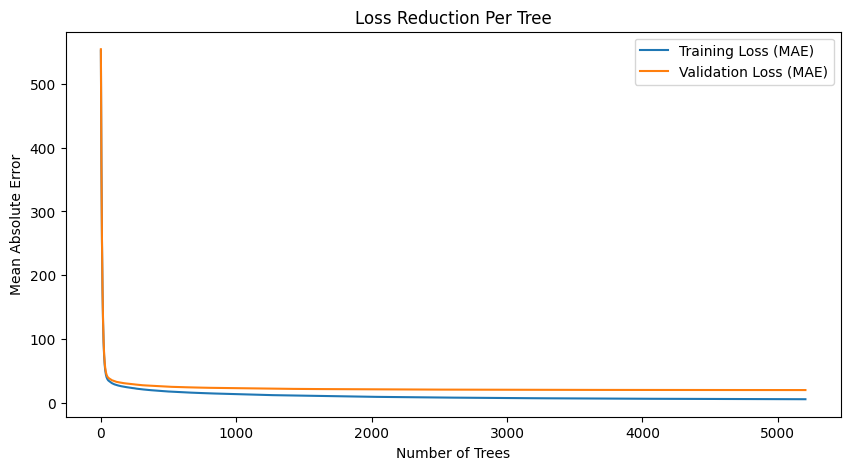

In [17]:
import matplotlib.pyplot as plt

# Assuming 'progress' is the dictionary containing evaluation metrics
train_mae = progress['train']['mae']
val_mae = progress['validation']['mae']

plt.figure(figsize=(10, 5))
plt.plot(train_mae, label='Training Loss (MAE)')
plt.plot(val_mae, label='Validation Loss (MAE)')
plt.title('Loss Reduction Per Tree')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


In [25]:
# import numpy as np
# import xgboost as xgb
# from tqdm.auto import tqdm  # Using tqdm.auto to ensure compatibility with notebooks and consoles

# # Learning rate decay function
# def eta_decay(iteration):
#     max_iter = 10000
#     x = iteration + 1
#     eta_base = 0.1
#     eta_min = 0.01
#     decay_rate = -(x / 2000) ** 2 / max_iter
#     return eta_min + (eta_base - eta_min) * np.exp(decay_rate)

# # Generate learning rate decay for each iteration
# max_iter = 10000
# eta_decays = np.array([eta_decay(iteration) for iteration in range(max_iter)])

# # XGBoost parameters
# PARAMS = {
#     'booster': 'gbtree',
#     'eval_metric': 'mae',
#     'max_depth': 5,
#     'tree_method': 'hist',  # Enable GPU acceleration
#     'eta': 0.5,  # Initial learning rate
#     'device' : 'cuda',  # Use GPU
#     'reg_lambda' : 5,
#     'reg_alpha' : 0.1,
#     #'gamma': 2
# }

# # Assuming dtrain and dval are defined XGBoost DMatrix objects
# progress = dict()

# # Define a callback for tqdm to show the progress bar correctly
# class TQDMCallback(xgb.callback.TrainingCallback):
#     def __init__(self, total):
#         self.bar = tqdm(total=total, desc='Training Progress')

#     def after_iteration(self, model, epoch, evals_log):
#         self.bar.update(1)
#         return False  # Continue the training

#     def after_training(self, model):
#         self.bar.close()  # Ensure the progress bar closes after training
#         return model

# # Train model with progress bar
# model = xgb.train(
#     params=PARAMS,
#     dtrain=dtrain,
#     num_boost_round=max_iter,
#     early_stopping_rounds=100,
#     evals=[(dtrain, 'train'), (dval, 'validation')],
#     evals_result=progress,
#     verbose_eval=100,
#     callbacks=[
#         TQDMCallback(max_iter),
#         xgb.callback.LearningRateScheduler(
#             lambda iteration: eta_decays[iteration] if iteration < len(eta_decays) else eta_decays[-1]
#         )
#     ]
# )

# print("Model training complete.")
# # Optionally, access and print the evaluation results
# #print(progress)


Training Progress:   0%|          | 0/10000 [00:00<?, ?it/s]

[0]	train-mae:781.06173	validation-mae:779.44006
[100]	train-mae:225.21325	validation-mae:225.50916
[200]	train-mae:170.59566	validation-mae:170.99098
[300]	train-mae:143.98861	validation-mae:144.44959
[400]	train-mae:125.31050	validation-mae:125.80264
[500]	train-mae:112.41404	validation-mae:112.94992
[600]	train-mae:102.19437	validation-mae:102.71050
[700]	train-mae:96.19191	validation-mae:96.75661
[800]	train-mae:89.86280	validation-mae:90.48641
[900]	train-mae:85.49591	validation-mae:86.15391
[1000]	train-mae:81.76229	validation-mae:82.43848
[1100]	train-mae:78.66434	validation-mae:79.38792
[1200]	train-mae:75.92304	validation-mae:76.67114
[1300]	train-mae:73.41451	validation-mae:74.17116
[1400]	train-mae:70.77558	validation-mae:71.55977
[1500]	train-mae:68.40800	validation-mae:69.20036
[1600]	train-mae:66.67168	validation-mae:67.48268
[1700]	train-mae:64.95710	validation-mae:65.77811
[1800]	train-mae:63.30419	validation-mae:64.13560
[1900]	train-mae:61.88727	validation-mae:62.7372

In [12]:
import numpy as np
import xgboost as xgb
from tqdm.auto import tqdm  # Using tqdm.auto to ensure compatibility with notebooks and consoles

# Learning rate decay function
def eta_decay(iteration):
    max_iter = 40000
    x = iteration + 1
    eta_base = 0.1
    eta_min = 0.01
    decay_rate = -(x / 8000) ** 2 / max_iter
    return eta_min + (eta_base - eta_min) * np.exp(decay_rate)

# Generate learning rate decay for each iteration
max_iter = 40000
eta_decays = np.array([eta_decay(iteration) for iteration in range(max_iter)])

# XGBoost parameters
PARAMS = {
    'booster': 'gbtree',
    'eval_metric': 'mae',
    'max_depth': 5,
    'tree_method': 'hist',  # Enable GPU acceleration
    'eta': 0.5,  # Initial learning rate
    'device' : 'cuda',  # Use GPU
    'reg_lambda' : 5,
    'reg_alpha' : 0.1,
    #'gamma': 2
}

# Assuming dtrain and dval are defined XGBoost DMatrix objects
progress = dict()

# Define a callback for tqdm to show the progress bar correctly
class TQDMCallback(xgb.callback.TrainingCallback):
    def __init__(self, total):
        self.bar = tqdm(total=total, desc='Training Progress')

    def after_iteration(self, model, epoch, evals_log):
        self.bar.update(1)
        return False  # Continue the training

    def after_training(self, model):
        self.bar.close()  # Ensure the progress bar closes after training
        return model

# Train model with progress bar
model = xgb.train(
    params=PARAMS,
    dtrain=dtrain,
    num_boost_round=max_iter,
    early_stopping_rounds=100,
    evals=[(dtrain, 'train'), (dval, 'validation')],
    evals_result=progress,
    verbose_eval=100,
    callbacks=[
        TQDMCallback(max_iter),
        xgb.callback.LearningRateScheduler(
            lambda iteration: eta_decays[iteration] if iteration < len(eta_decays) else eta_decays[-1]
        )
    ]
)

print("Model training complete.")
# Optionally, access and print the evaluation results
#print(progress)


Training Progress:   0%|          | 0/40000 [00:00<?, ?it/s]

[0]	train-mae:778.18817	validation-mae:780.02409
[100]	train-mae:253.54170	validation-mae:254.52373
[200]	train-mae:184.56579	validation-mae:185.54345
[300]	train-mae:152.99142	validation-mae:154.00577
[400]	train-mae:133.93787	validation-mae:134.97889
[500]	train-mae:119.63420	validation-mae:120.62894
[600]	train-mae:109.56109	validation-mae:110.51886
[700]	train-mae:102.05680	validation-mae:103.00220
[800]	train-mae:96.29101	validation-mae:97.25731
[900]	train-mae:91.88597	validation-mae:92.86966
[1000]	train-mae:87.65852	validation-mae:88.67573
[1100]	train-mae:84.46785	validation-mae:85.48180
[1200]	train-mae:81.09448	validation-mae:82.11626
[1300]	train-mae:78.49731	validation-mae:79.55599
[1400]	train-mae:75.68858	validation-mae:76.74548
[1500]	train-mae:73.01143	validation-mae:74.07874
[1600]	train-mae:71.10827	validation-mae:72.19847
[1700]	train-mae:69.22075	validation-mae:70.31977
[1800]	train-mae:67.32968	validation-mae:68.43262
[1900]	train-mae:66.04668	validation-mae:67.16

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'model' is your trained XGBoost model and 'dtest' is your test dataset
y_test_pred = model.predict(dtest)

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (MAE) on test data:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) on test data:", rmse)

Mean Absolute Error (MAE) on test data: 23.71620001517015
Root Mean Squared Error (RMSE) on test data: 48.026923903428084


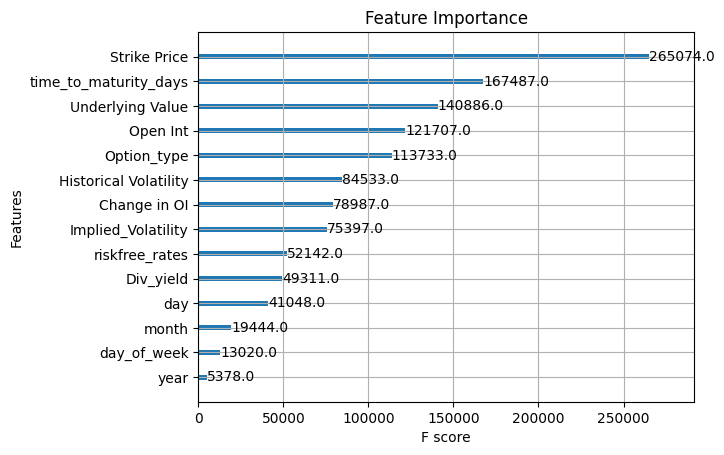

In [14]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

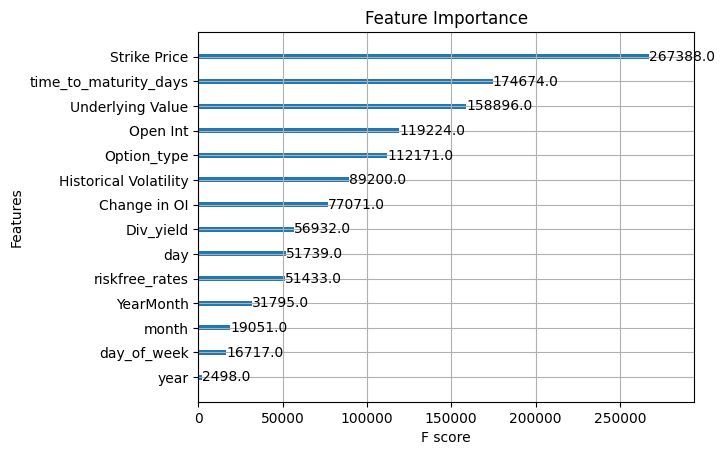

In [28]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

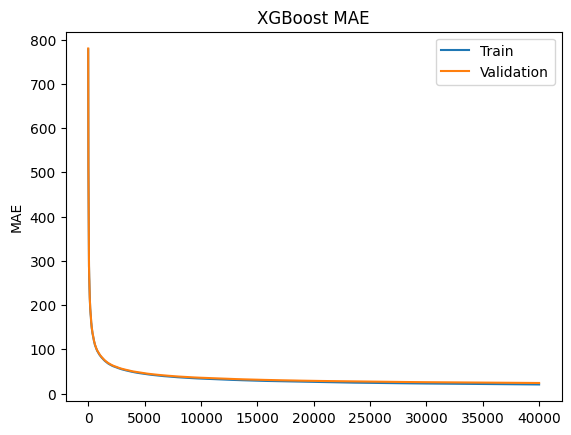

In [16]:
# Extract the MAE for training and validation from the evaluation result
epochs = len(progress['validation']['mae'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, progress['train']['mae'], label='Train')
ax.plot(x_axis, progress['validation']['mae'], label='Validation')
ax.legend()

plt.ylabel('MAE')
plt.title('XGBoost MAE')
plt.show()

# For more advanced, smooth curves, consider averaging the results over multiple iterations


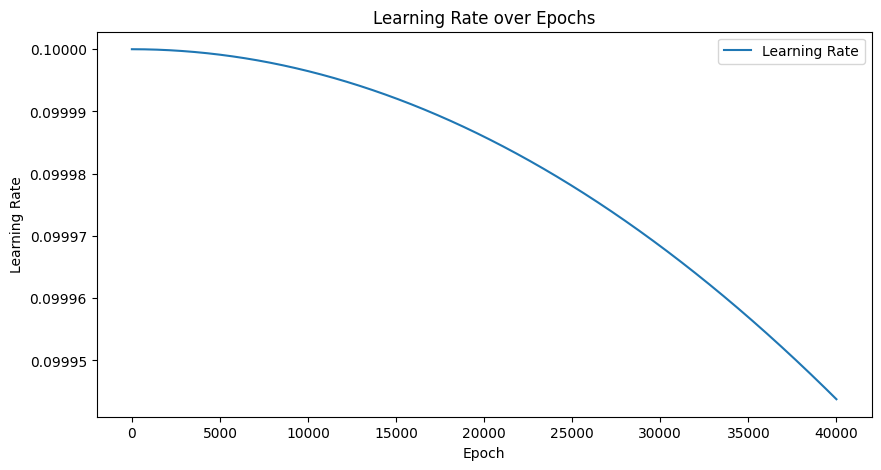

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(x_axis, eta_decays[:epochs], label='Learning Rate')
plt.title('Learning Rate over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


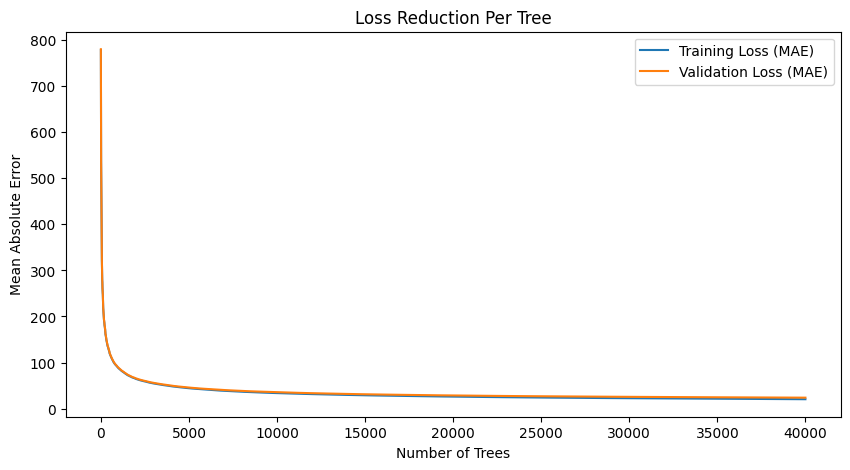

In [18]:
import matplotlib.pyplot as plt

# Assuming 'progress' is the dictionary containing evaluation metrics
train_mae = progress['train']['mae']
val_mae = progress['validation']['mae']

plt.figure(figsize=(10, 5))
plt.plot(train_mae, label='Training Loss (MAE)')
plt.plot(val_mae, label='Validation Loss (MAE)')
plt.title('Loss Reduction Per Tree')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


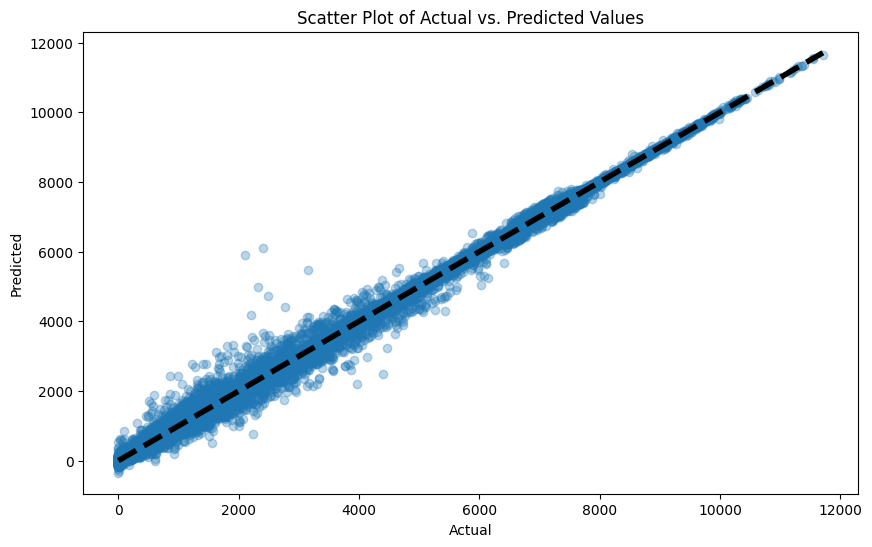

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()


In [21]:
y_test['XGboost_test_5'] = y_test_pred

In [27]:
y_test

1585870                                                        12.6
2144190                                                     2155.85
458738                                                      1980.55
2220750                                                        4.45
2121441                                                      183.45
                                        ...                        
479013                                                      3857.25
659867                                                       2920.8
1638263                                                      1146.8
1695569                                                      690.35
XGboost_test_5    [41.368286, 2119.4485, 2013.1476, 24.197266, 1...
Name: Settle Price, Length: 396931, dtype: object

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute residuals
y_test['Residuals'] = y_test['XGboost_test_5'] - y_test['Settle Price']

plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Residuals'], label='Residuals (BS Price - Settle Price)', color='green')
plt.title('Residuals of Black-Scholes and Settle Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(0, color='black', linewidth=0.8)  # Adds a line at zero
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Settle Price'

In [12]:
X_train

,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,riskfree_rates,Div_yield,Historical Volatility,year,month,day,day_of_week
1920797,0,15300.0,0.0,0.0,15115.80,80,3.954200,1.05,0.185573,2021,2,8,0
7899,1,6100.0,0.0,0.0,11584.30,995,6.946033,1.14,0.114500,2019,4,10,2
1918919,0,12850.0,0.0,0.0,14924.25,13,3.954200,1.06,0.350517,2021,2,5,4
2314894,0,14050.0,0.0,0.0,17525.10,38,6.344690,1.33,0.113074,2022,8,8,0
343943,1,9150.0,0.0,0.0,9111.90,14,4.019050,1.67,0.719537,2020,4,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331085,0,17300.0,47000.0,27550.0,17312.90,17,6.344690,1.45,0.134732,2022,8,29,0
505252,1,11100.0,0.0,0.0,11440.05,31,3.848930,1.47,0.140561,2020,9,14,0
148221,1,7200.0,0.0,0.0,11582.60,63,5.441760,1.29,0.206552,2019,10,24,3
1501992,0,11600.0,0.0,0.0,11910.15,29,5.643690,1.25,0.085502,2019,12,11,2


In [9]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

In [14]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 1000, 'reg_lambda': 5}


In [17]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 500, 'reg_lambda': 3}


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE on Test Data:", mae)
print("MSE on Test Data:", mse)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:19:39] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


MAE on Test Data: 20.792923340567256
MSE on Test Data: 2765.4858089644918


In [15]:
feature_importances = best_model.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [3.6816353e-01 9.4626434e-02 2.9143896e-03 2.4021912e-02 1.1546306e-01
 1.5389346e-01 2.7597338e-02 1.2886414e-02 5.6345095e-03 1.8445003e-01
 9.6775228e-03 5.0490879e-04 1.6650881e-04]


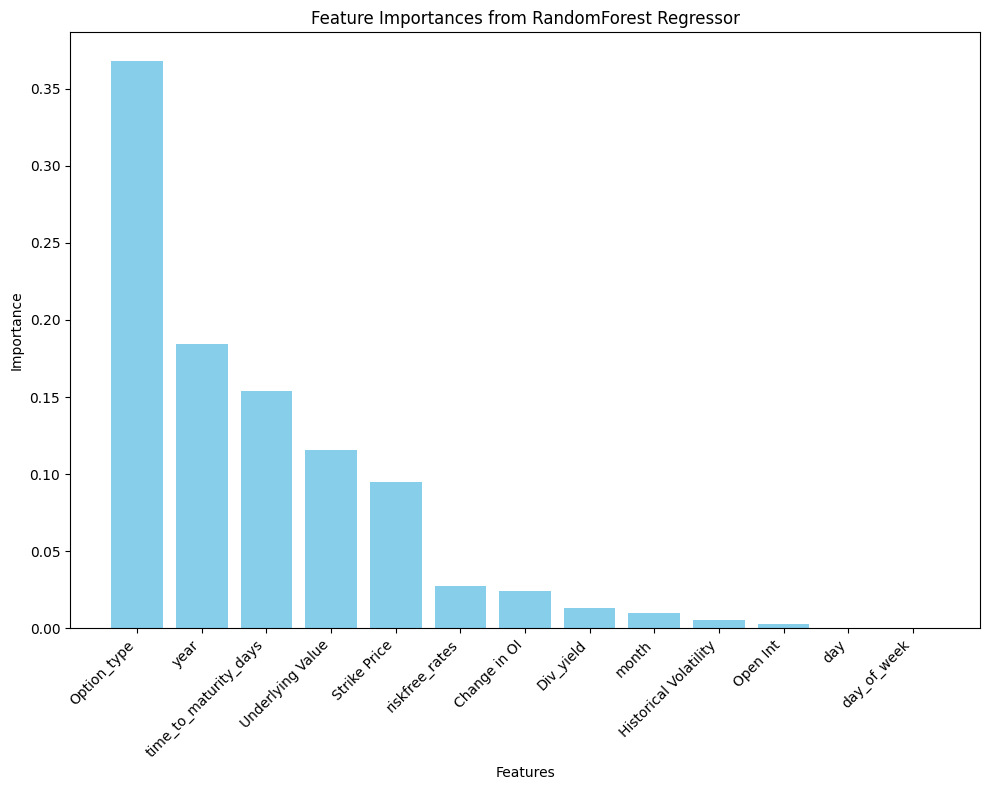

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `rf_regressor` is your trained RandomForestRegressor model
importances = best_model.feature_importances_

# If you have the names of the features stored in a list called `feature_names`
feature_names = X_train1.columns

# Sorting the features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForest Regressor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

# Show the plot
plt.show()


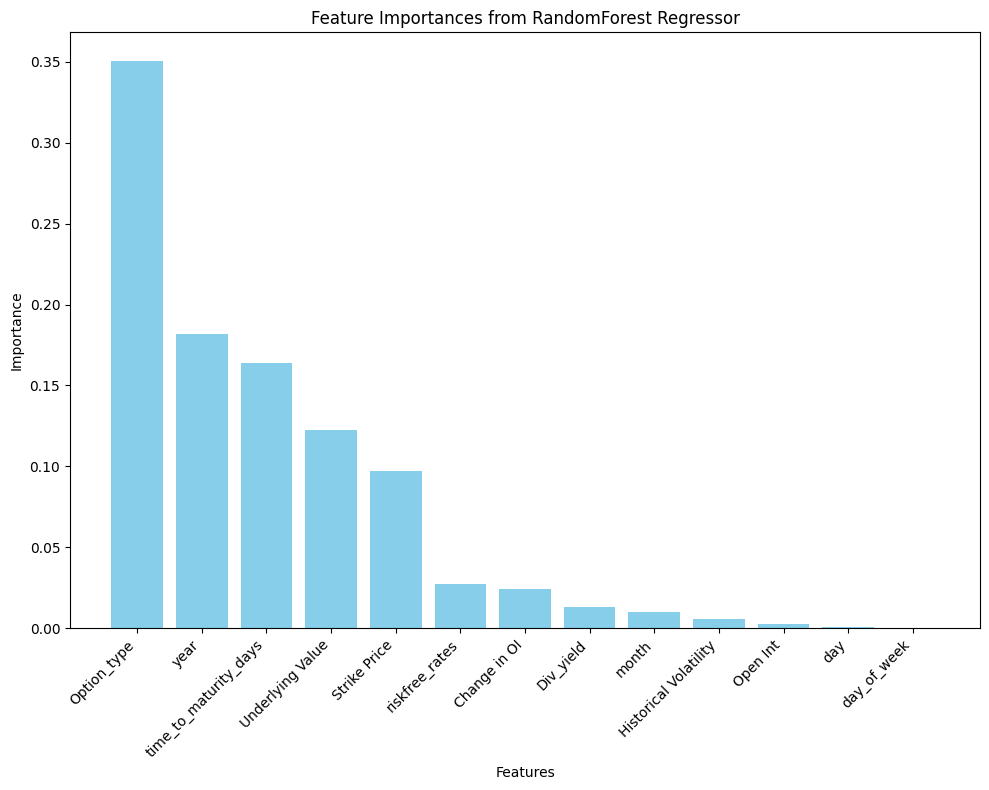

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `rf_regressor` is your trained RandomForestRegressor model
importances = best_model.feature_importances_

# If you have the names of the features stored in a list called `feature_names`
feature_names = X_train1.columns

# Sorting the features by importance
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.bar(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForest Regressor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels

# Show the plot
plt.show()


In [11]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [13]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
from joblib import dump

# Save the best estimator
best_model = grid_search.best_estimator_
dump(best_model, 'best_xgb_model1.joblib')


['best_xgb_model1.joblib']

In [ ]:
loaded_model = load('best_xgb_model.joblib')

# Now you can use loaded_model to make predictions
# For example:
predictions = loaded_model.predict(X_new)

In [ ]:
Best Parameters: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 500, 'reg_lambda': 3}

In [20]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',  # More efficient histogram method
    device='cuda',  # Use GPU
   # predictor='gpu_predictor',  # Consistency in device usage
    max_depth=10,  # Reduced from 15 and 20 to decrease complexity
    n_estimators=500,  # Reduced upper limit
    learning_rate=0.1,
    reg_lambda=2,
    subsample=0.8,  # Using 80% of data for growing trees
    colsample_bytree=0.8,  # Using 80% of features
    #gpu_id=0,  # Explicitly setting GPU ID if multiple GPUs are present
    early_stopping_rounds=10
)

parameters = {
    'max_depth': [10, 12],
    'n_estimators': [300, 500],
    'learning_rate': [0.05, 0.1],
    'reg_lambda': [1, 2],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, verbose=3)

# Note: eval_set is passed via fit_params in GridSearchCV to properly use early stopping
fit_params = {'eval_set': [(X_val, y_val)], 'verbose': 3}
grid_search.fit(X_train, y_train, **fit_params)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[0]	validation_0-rmse:1388.49750
[3]	validation_0-rmse:1259.01500
[6]	validation_0-rmse:1150.51964
[0]	validation_0-rmse:1388.54097
[0]	validation_0-rmse:1388.53903
[9]	validation_0-rmse:1058.77670
[3]	validation_0-rmse:1259.27989
[0]	validation_0-rmse:1391.54349
[3]	validation_0-rmse:1259.46474
[12]	validation_0-rmse:982.30866
[6]	validation_0-rmse:1150.86362
[3]	validation_0-rmse:1262.42515
[6]	validation_0-rmse:1155.12255
[15]	validation_0-rmse:914.61416
[9]	validation_0-rmse:1058.86241
[6]	validation_0-rmse:1154.06840
[9]	validation_0-rmse:1062.02196
[18]	validation_0-rmse:799.49546
[12]	validation_0-rmse:982.40636
[9]	validation_0-rmse:1061.21346
[12]	validation_0-rmse:983.00099
[21]	validation_0-rmse:750.94756
[15]	validation_0-rmse:914.78137
[12]	validation_0-rmse:985.05261
[15]	validation_0-rmse:916.03227
[24]	validation_0-rmse:706.98677
[18]	validation_0-rmse:799.53854
[15]	validation_0-rmse:917.89486
[18]	validatio

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:32:31] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[297]	validation_0-rmse:79.07782
[297]	validation_0-rmse:79.09629
[299]	validation_0-rmse:78.82284
[297]	validation_0-rmse:80.11519
[299]	validation_0-rmse:78.86152
[299]	validation_0-rmse:79.89180


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:32:31] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:32:32] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo

[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=300, reg_lambda=1, subsample=0.8;, score=-51.231 total time=  36.4s
[0]	validation_0-rmse:1391.47243
[3]	validation_0-rmse:1261.95262
[6]	validation_0-rmse:1153.61506
[9]	validation_0-rmse:1060.64710
[12]	validation_0-rmse:980.68149
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=300, reg_lambda=1, subsample=0.7;, score=-50.763 total time=  36.9s
[0]	validation_0-rmse:1388.58733
[15]	validation_0-rmse:913.53108
[3]	validation_0-rmse:1259.92672
[18]	validation_0-rmse:798.20075
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=300, reg_lambda=1, subsample=0.7;, score=-51.361 total time=  36.7s
[0]	validation_0-rmse:1388.73395
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=300, reg_lambda=1, subsample=0.7;, score=-50.790 total time=  37.0s
[0]	validation_0-rmse:1391.71829
[6]	validation_0-rmse:1155.47352
[21]

KeyboardInterrupt: 

In [9]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', device='cuda',  early_stopping_rounds=10)  # Adjusted for GPU
parameters = {
    'max_depth': [15, 20],
    'n_estimators': [500,1000],
    'learning_rate': [0.05, 0.1, 0.2],
    'reg_lambda': [2, 5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3,  verbose=3)

grid_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=3)
#grid_search.fit(dtrain, eval_set=[(dval)], verbose=3)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[0]	validation_0-rmse:1385.68225
[0]	validation_0-rmse:1385.04201
[0]	validation_0-rmse:1385.10409
[0]	validation_0-rmse:1385.07661
[3]	validation_0-rmse:1194.72227
[3]	validation_0-rmse:1192.52751
[3]	validation_0-rmse:1192.54223
[3]	validation_0-rmse:1192.58465
[6]	validation_0-rmse:1030.83817
[6]	validation_0-rmse:1027.31264
[6]	validation_0-rmse:1027.35656
[6]	validation_0-rmse:1027.54937
[9]	validation_0-rmse:890.01166
[9]	validation_0-rmse:885.53962
[9]	validation_0-rmse:885.56219
[9]	validation_0-rmse:885.63559
[12]	validation_0-rmse:769.04128
[12]	validation_0-rmse:763.88455
[12]	validation_0-rmse:763.69756
[12]	validation_0-rmse:763.88483
[15]	validation_0-rmse:665.10287
[15]	validation_0-rmse:659.51758
[15]	validation_0-rmse:659.08688
[15]	validation_0-rmse:659.39050
[18]	validation_0-rmse:575.95590
[21]	validation_0-rmse:499.31609
[18]	validation_0-rmse:569.34734
[18]	validation_0-rmse:569.94927
[18]	validation_0-r

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:22:44] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[486]	validation_0-rmse:56.87511
[396]	validation_0-rmse:58.71280
[405]	validation_0-rmse:57.07622
[489]	validation_0-rmse:56.86972
[408]	validation_0-rmse:57.07827
[399]	validation_0-rmse:58.71463
[492]	validation_0-rmse:56.86288
[411]	validation_0-rmse:57.06841
[495]	validation_0-rmse:56.85616
[402]	validation_0-rmse:58.71715
[498]	validation_0-rmse:56.85088
[414]	validation_0-rmse:57.06518
[405]	validation_0-rmse:58.71709
[499]	validation_0-rmse:56.84792
[CV 3/3] END learning_rate=0.05, max_depth=15, n_estimators=500, reg_lambda=2;, score=-22.749 total time= 4.8min
[0]	validation_0-rmse:1385.70049
[417]	validation_0-rmse:57.06444
[3]	validation_0-rmse:1194.86358
[408]	validation_0-rmse:58.70746
[420]	validation_0-rmse:57.06202
[6]	validation_0-rmse:1031.01376
[411]	validation_0-rmse:58.70058


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:22:51] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[414]	validation_0-rmse:58.70014
[423]	validation_0-rmse:57.05684
[9]	validation_0-rmse:890.14337
[426]	validation_0-rmse:57.04579
[417]	validation_0-rmse:58.69226
[12]	validation_0-rmse:769.05889
[420]	validation_0-rmse:58.69518
[429]	validation_0-rmse:57.04066
[15]	validation_0-rmse:665.16267
[423]	validation_0-rmse:58.68603
[432]	validation_0-rmse:57.03906
[CV 1/3] END learning_rate=0.05, max_depth=15, n_estimators=500, reg_lambda=5;, score=-23.001 total time= 4.9min
[0]	validation_0-rmse:1385.72238
[18]	validation_0-rmse:575.90754
[435]	validation_0-rmse:57.03819
[426]	validation_0-rmse:58.67952
[3]	validation_0-rmse:1194.84968
[21]	validation_0-rmse:499.22596
[438]	validation_0-rmse:57.03663
[429]	validation_0-rmse:58.67427
[6]	validation_0-rmse:1030.94387
[24]	validation_0-rmse:433.53751
[441]	validation_0-rmse:57.03076
[432]	validation_0-rmse:58.67704
[9]	validation_0-rmse:890.13031
[27]	validation_0-rmse:377.27546
[435]	validation_0-rmse:58.67337
[444]	validation_0-rmse:57.0288

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:23:14] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[33]	validation_0-rmse:287.22968
[468]	validation_0-rmse:57.00538
[48]	validation_0-rmse:156.33992
[471]	validation_0-rmse:57.00266
[36]	validation_0-rmse:251.63317
[51]	validation_0-rmse:140.71096
[474]	validation_0-rmse:56.99808
[39]	validation_0-rmse:221.34965
[477]	validation_0-rmse:57.00277
[CV 1/3] END learning_rate=0.05, max_depth=15, n_estimators=500, reg_lambda=2;, score=-22.883 total time= 5.3min
[0]	validation_0-rmse:1385.04201
[54]	validation_0-rmse:127.53372
[480]	validation_0-rmse:57.00153
[42]	validation_0-rmse:195.59048
[3]	validation_0-rmse:1192.54223
[57]	validation_0-rmse:116.48574
[483]	validation_0-rmse:56.99335
[45]	validation_0-rmse:173.57273
[6]	validation_0-rmse:1027.31264
[486]	validation_0-rmse:56.98880
[60]	validation_0-rmse:107.25726
[48]	validation_0-rmse:155.00182
[9]	validation_0-rmse:885.53962
[489]	validation_0-rmse:56.98900
[12]	validation_0-rmse:763.88455
[63]	validation_0-rmse:99.61419
[51]	validation_0-rmse:139.25640
[492]	validation_0-rmse:56.9824

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:23:35] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[63]	validation_0-rmse:98.44730
[75]	validation_0-rmse:80.29029
[27]	validation_0-rmse:370.94605
[66]	validation_0-rmse:92.10658
[78]	validation_0-rmse:77.34085
[30]	validation_0-rmse:322.64254
[CV 2/3] END learning_rate=0.05, max_depth=15, n_estimators=500, reg_lambda=2;, score=-22.503 total time= 5.6min
[0]	validation_0-rmse:1385.07661
[69]	validation_0-rmse:86.80988
[81]	validation_0-rmse:75.01137
[33]	validation_0-rmse:281.64737
[3]	validation_0-rmse:1192.58465
[72]	validation_0-rmse:82.60411
[36]	validation_0-rmse:246.70234
[84]	validation_0-rmse:72.60414
[6]	validation_0-rmse:1027.54937
[39]	validation_0-rmse:216.95911
[75]	validation_0-rmse:79.16147
[87]	validation_0-rmse:70.73125
[9]	validation_0-rmse:885.63559
[42]	validation_0-rmse:191.50274
[12]	validation_0-rmse:763.88483
[78]	validation_0-rmse:76.32049
[90]	validation_0-rmse:69.18923
[15]	validation_0-rmse:659.39050
[45]	validation_0-rmse:169.93858
[93]	validation_0-rmse:67.79425
[81]	validation_0-rmse:73.89726
[18]	valida

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[402]	validation_0-rmse:56.12209
[495]	validation_0-rmse:55.67658
[405]	validation_0-rmse:56.11320
[498]	validation_0-rmse:55.66696
[408]	validation_0-rmse:56.10214
[501]	validation_0-rmse:55.66237
[411]	validation_0-rmse:56.09038
[504]	validation_0-rmse:55.65867
[414]	validation_0-rmse:56.07138
[27]	validation_0-rmse:367.89771
[417]	validation_0-rmse:56.06336
[507]	validation_0-rmse:55.65824
[0]	validation_0-rmse:1384.93135
[420]	validation_0-rmse:56.05459
[510]	validation_0-rmse:55.65908
[423]	validation_0-rmse:56.04294
[513]	validation_0-rmse:55.65618
[426]	validation_0-rmse:56.03149
[516]	validation_0-rmse:55.65146
[429]	validation_0-rmse:56.02486
[3]	validation_0-rmse:1192.00314
[519]	validation_0-rmse:55.64482
[432]	validation_0-rmse:56.02064
[522]	validation_0-rmse:55.63935
[30]	validation_0-rmse:319.47242
[435]	validation_0-rmse:56.01212
[525]	validation_0-rmse:55.63572
[438]	validation_0-rmse:55.99972
[528]	validation_0-rmse:55.63477
[441]	validation_0-rmse:56.00042
[531]	vali

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:45:05] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[81]	validation_0-rmse:59.78299
[CV 1/3] END learning_rate=0.1, max_depth=15, n_estimators=500, reg_lambda=2;, score=-23.987 total time= 2.5min
[174]	validation_0-rmse:63.19497
[84]	validation_0-rmse:59.68674
[87]	validation_0-rmse:59.57725
[90]	validation_0-rmse:59.46157
[156]	validation_0-rmse:60.94728
[93]	validation_0-rmse:59.21872
[0]	validation_0-rmse:1314.18160
[96]	validation_0-rmse:59.13732
[3]	validation_0-rmse:967.44525
[99]	validation_0-rmse:59.00471
[6]	validation_0-rmse:714.16315
[177]	validation_0-rmse:63.19555
[102]	validation_0-rmse:58.85632
[9]	validation_0-rmse:529.18747
[12]	validation_0-rmse:394.20957
[105]	validation_0-rmse:58.73917
[108]	validation_0-rmse:58.65455
[15]	validation_0-rmse:296.41950
[159]	validation_0-rmse:60.93327
[111]	validation_0-rmse:58.57008
[18]	validation_0-rmse:225.46052
[114]	validation_0-rmse:58.51773
[180]	validation_0-rmse:63.18887
[21]	validation_0-rmse:174.59797
[117]	validation_0-rmse:58.47018
[120]	validation_0-rmse:58.39918
[24]	va

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:46:59] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END learning_rate=0.1, max_depth=15, n_estimators=500, reg_lambda=2;, score=-23.377 total time= 3.1min
[153]	validation_0-rmse:58.87705
[156]	validation_0-rmse:58.87026
[186]	validation_0-rmse:60.83500
[159]	validation_0-rmse:58.84170
[162]	validation_0-rmse:58.82259
[213]	validation_0-rmse:63.16874
[165]	validation_0-rmse:58.81490
[0]	validation_0-rmse:1315.35868
[168]	validation_0-rmse:58.80603
[3]	validation_0-rmse:971.28070
[171]	validation_0-rmse:58.77436
[6]	validation_0-rmse:719.63006
[174]	validation_0-rmse:58.76372
[9]	validation_0-rmse:535.41371
[177]	validation_0-rmse:58.73976
[189]	validation_0-rmse:60.83289
[216]	validation_0-rmse:63.17079
[12]	validation_0-rmse:401.29795
[180]	validation_0-rmse:58.73311
[15]	validation_0-rmse:303.90620
[183]	validation_0-rmse:58.71192
[186]	validation_0-rmse:58.71118
[18]	validation_0-rmse:233.56397
[189]	validation_0-rmse:58.70663
[21]	validation_0-rmse:182.12814
[192]	validation_0-rmse:58.70709
[219]	validation_0-rmse:63.16547


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:47:33] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[42]	validation_0-rmse:73.06460
[225]	validation_0-rmse:63.16060
[45]	validation_0-rmse:69.82841
[48]	validation_0-rmse:67.38058
[CV 3/3] END learning_rate=0.1, max_depth=15, n_estimators=500, reg_lambda=2;, score=-23.831 total time= 2.4min
[0]	validation_0-rmse:1315.39466
[198]	validation_0-rmse:60.82223
[3]	validation_0-rmse:971.45314
[51]	validation_0-rmse:65.92196
[228]	validation_0-rmse:63.15594
[6]	validation_0-rmse:719.81931
[54]	validation_0-rmse:64.91832
[9]	validation_0-rmse:535.57301
[57]	validation_0-rmse:64.19645
[12]	validation_0-rmse:401.28848
[60]	validation_0-rmse:63.59933
[15]	validation_0-rmse:303.65113
[201]	validation_0-rmse:60.82468
[63]	validation_0-rmse:62.97653
[18]	validation_0-rmse:232.51060
[231]	validation_0-rmse:63.15497
[66]	validation_0-rmse:62.55622
[21]	validation_0-rmse:181.27677
[69]	validation_0-rmse:62.23262
[24]	validation_0-rmse:144.80586
[72]	validation_0-rmse:61.96975
[27]	validation_0-rmse:119.12344
[75]	validation_0-rmse:61.77840
[204]	valida

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:49:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[207]	validation_0-rmse:57.73153
[138]	validation_0-rmse:58.11554
[210]	validation_0-rmse:57.71896
[141]	validation_0-rmse:58.04544
[213]	validation_0-rmse:57.69602
[144]	validation_0-rmse:57.98525
[216]	validation_0-rmse:57.68773
[147]	validation_0-rmse:57.89290
[219]	validation_0-rmse:57.67616
[150]	validation_0-rmse:57.82269
[CV 2/3] END learning_rate=0.05, max_depth=20, n_estimators=500, reg_lambda=2;, score=-22.477 total time=15.8min
[0]	validation_0-rmse:1315.43873
[222]	validation_0-rmse:57.66454
[261]	validation_0-rmse:63.13154
[153]	validation_0-rmse:57.75769
[3]	validation_0-rmse:971.52284
[225]	validation_0-rmse:57.64389
[6]	validation_0-rmse:719.63941
[156]	validation_0-rmse:57.68368
[228]	validation_0-rmse:57.62293
[9]	validation_0-rmse:535.34971
[159]	validation_0-rmse:57.62532
[231]	validation_0-rmse:57.60954
[234]	validation_0-rmse:57.59995
[12]	validation_0-rmse:401.01243
[162]	validation_0-rmse:57.58030
[237]	validation_0-rmse:57.58621
[264]	validation_0-rmse:63.12924

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:50:26] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[306]	validation_0-rmse:56.69228
[126]	validation_0-rmse:58.11407
[309]	validation_0-rmse:56.69134
[129]	validation_0-rmse:58.06736
[312]	validation_0-rmse:56.69569
[132]	validation_0-rmse:57.97630
[294]	validation_0-rmse:63.10944
[135]	validation_0-rmse:57.92819
[138]	validation_0-rmse:57.87375
[CV 1/3] END learning_rate=0.1, max_depth=15, n_estimators=500, reg_lambda=5;, score=-23.378 total time= 3.4min
[0]	validation_0-rmse:1314.06045
[141]	validation_0-rmse:57.82416
[3]	validation_0-rmse:967.49296
[144]	validation_0-rmse:57.78895
[6]	validation_0-rmse:714.30833
[147]	validation_0-rmse:57.74946
[CV 2/3] END learning_rate=0.1, max_depth=15, n_estimators=500, reg_lambda=5;, score=-23.704 total time= 2.9min
[0]	validation_0-rmse:1314.12845
[297]	validation_0-rmse:63.10871
[150]	validation_0-rmse:57.69566
[9]	validation_0-rmse:529.43675
[3]	validation_0-rmse:967.53170
[153]	validation_0-rmse:57.66269
[12]	validation_0-rmse:395.00432
[6]	validation_0-rmse:714.22914
[156]	validation_0-rms

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:56:34] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[264]	validation_0-rmse:56.93422
[267]	validation_0-rmse:56.93470
[269]	validation_0-rmse:56.93255
[6]	validation_0-rmse:712.48273
[CV 2/3] END learning_rate=0.1, max_depth=15, n_estimators=1000, reg_lambda=5;, score=-23.704 total time= 2.9min
[0]	validation_0-rmse:1313.83599
[CV 3/3] END learning_rate=0.1, max_depth=15, n_estimators=1000, reg_lambda=5;, score=-23.753 total time= 2.5min
[0]	validation_0-rmse:1315.15592
[9]	validation_0-rmse:526.80944
[3]	validation_0-rmse:966.34351
[39]	validation_0-rmse:73.15657
[3]	validation_0-rmse:970.41670
[6]	validation_0-rmse:712.52224
[12]	validation_0-rmse:391.38504
[6]	validation_0-rmse:718.49206
[9]	validation_0-rmse:526.78001
[9]	validation_0-rmse:534.03158
[15]	validation_0-rmse:292.94180
[12]	validation_0-rmse:399.52997
[12]	validation_0-rmse:391.49804
[42]	validation_0-rmse:70.23776
[15]	validation_0-rmse:301.06452
[CV 2/3] END learning_rate=0.1, max_depth=20, n_estimators=500, reg_lambda=2;, score=nan total time=  43.1s
[0]	validation_0

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:05:52] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[12]	validation_0-rmse:120.02272
[21]	validation_0-rmse:72.17915
[15]	validation_0-rmse:88.95357
[24]	validation_0-rmse:68.97454
[CV 1/3] END learning_rate=0.1, max_depth=20, n_estimators=500, reg_lambda=2;, score=-23.467 total time=11.5min
[0]	validation_0-rmse:1172.60149
[240]	validation_0-rmse:61.33660
[18]	validation_0-rmse:75.96537
[3]	validation_0-rmse:617.21954
[27]	validation_0-rmse:67.47016
[6]	validation_0-rmse:332.62587
[21]	validation_0-rmse:70.18933
[30]	validation_0-rmse:65.98135
[9]	validation_0-rmse:189.54591
[33]	validation_0-rmse:65.34368
[24]	validation_0-rmse:66.95641
[12]	validation_0-rmse:120.40523
[36]	validation_0-rmse:64.86084
[243]	validation_0-rmse:61.33560
[27]	validation_0-rmse:65.64608
[39]	validation_0-rmse:64.27211
[15]	validation_0-rmse:89.57499
[30]	validation_0-rmse:64.81307
[42]	validation_0-rmse:63.96102
[18]	validation_0-rmse:76.91833
[45]	validation_0-rmse:63.82780
[33]	validation_0-rmse:64.23571
[48]	validation_0-rmse:63.62344
[36]	validation_0-r

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:09:00] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[171]	validation_0-rmse:59.83221
[6]	validation_0-rmse:329.01285
[174]	validation_0-rmse:59.82811
[176]	validation_0-rmse:59.83192
[CV 2/3] END learning_rate=0.2, max_depth=15, n_estimators=1000, reg_lambda=5;, score=-26.724 total time= 1.7min
[0]	validation_0-rmse:1171.85809
[9]	validation_0-rmse:185.14392
[CV 3/3] END learning_rate=0.2, max_depth=15, n_estimators=1000, reg_lambda=5;, score=-26.414 total time= 1.6min
[0]	validation_0-rmse:1174.60400
[3]	validation_0-rmse:615.06159
[3]	validation_0-rmse:621.68045
[24]	validation_0-rmse:68.45820
[12]	validation_0-rmse:116.37107
[6]	validation_0-rmse:336.99483
[6]	validation_0-rmse:328.94775
[9]	validation_0-rmse:193.38358
[27]	validation_0-rmse:67.48659
[15]	validation_0-rmse:85.58422
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=500, reg_lambda=2;, score=nan total time=  27.8s
[0]	validation_0-rmse:1174.68060
[3]	validation_0-rmse:622.03481
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=500, reg_lambda=5;, scor

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
   

[0]	validation_0-rmse:1385.37789
[3]	validation_0-rmse:1193.64346
[6]	validation_0-rmse:1029.10195
[9]	validation_0-rmse:887.72082
[12]	validation_0-rmse:766.25737
[15]	validation_0-rmse:661.90841
[18]	validation_0-rmse:572.36847
[21]	validation_0-rmse:495.48876
[24]	validation_0-rmse:429.54529
[27]	validation_0-rmse:373.30864
[30]	validation_0-rmse:325.06114
[33]	validation_0-rmse:283.71681
[36]	validation_0-rmse:248.43627
[39]	validation_0-rmse:218.11930
[42]	validation_0-rmse:192.25597
[45]	validation_0-rmse:170.23436
[48]	validation_0-rmse:151.64687
[51]	validation_0-rmse:136.02080
[54]	validation_0-rmse:122.83163
[57]	validation_0-rmse:111.84480
[60]	validation_0-rmse:102.55467
[63]	validation_0-rmse:94.86829
[66]	validation_0-rmse:88.44977
[69]	validation_0-rmse:83.16527
[72]	validation_0-rmse:78.92696
[75]	validation_0-rmse:75.38594
[78]	validation_0-rmse:72.49199
[81]	validation_0-rmse:70.03410
[84]	validation_0-rmse:67.95290
[87]	validation_0-rmse:66.04007
[90]	validation_0-rm

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=10,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [15, 20], 'n_estimators': [500, 1000],
                         'reg_lambda': [2, 5]},
             scoring='neg_mean_absolute_error', verbose=3)

[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=5;, score=nan total time=  28.5s
[CV 3/3] END learning_rate=0.2, max_depth=20, n_estimators=1000, reg_lambda=5;, score=nan total time=  27.5s
[CV 1/3] END learning_rate=0.2, max_depth=20, n_estimators=500, reg_lambda=2;, score=-25.674 total time= 4.9min
[CV 2/3] END learning_rate=0.2, max_depth=20, n_estimators=500, reg_lambda=2;, score=-25.340 total time= 3.7min


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', device='cuda', verbosity = 2)  # Adjusted for GPU
parameters = {
    'max_depth': [, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3)

grid_search.fit(X_train, y_train)

In [16]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda:0', early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
best_model1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda:0', early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [25]:
best_model1 = grid_search.best_estimator_

In [24]:
best_model1 = grid_search.best_estimator_

# Set GPU parameters for the booster
best_model1.set_params(tree_method='gpu_hist', gpu_id=0)

# Make predictions with the booster on the test data
test_predictions = best_model1.predict(dtest)
mae_test = mean_absolute_error(y_test, test_predictions)
print("MAE on Test Data:", mae_test)

/opt/conda/lib/python3.10/site-packages/xgboost/data.py:1037: UserWarning: Unknown data type: <class 'xgboost.core.DMatrix'>, trying to convert it to csr_matrix
  warnings.warn(


TypeError: Not supported type for data.<class 'xgboost.core.DMatrix'>

In [27]:
test_predictions = best_model1.predict(X_test)

XGBoostError: [10:24:07] /workspace/src/context.cc:173: Both `device` and `gpu_id` are specified. Use `device` instead.
Stack trace:
  [bt] (0) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x1ba24e) [0x7c7804fd824e]
  [bt] (1) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x2bd90a) [0x7c78050db90a]
  [bt] (2) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x4cc9ef) [0x7c78052ea9ef]
  [bt] (3) /opt/conda/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGBoosterGetNumFeature+0x32) [0x7c7804f7b5e2]
  [bt] (4) /opt/conda/lib/python3.10/lib-dynload/../../libffi.so.8(+0x6a4a) [0x7c78b0ea4a4a]
  [bt] (5) /opt/conda/lib/python3.10/lib-dynload/../../libffi.so.8(+0x5fea) [0x7c78b0ea3fea]
  [bt] (6) /opt/conda/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x12461) [0x7c78b0ebc461]
  [bt] (7) /opt/conda/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x86eb) [0x7c78b0eb26eb]
  [bt] (8) /opt/conda/bin/python3.10(_PyObject_MakeTpCall+0x26b) [0x5cf89ba4997b]



In [15]:
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, test_predictions)
print("MAE on Test Data:", mae_test)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [09:04:22] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


MAE on Test Data: 46.6566772797974


In [ ]:
grid_search.fit(X_train, y_train)
# Best estimator
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Optimized Mean Squared Error: {mse}')
print(f'Optimized Mean Absolute Error: {mae}')
print("Best Parameters:", grid_search.best_params_)